# Trabajo Práctico 0:  Algoritmo de Maximización de la Esperanza

**Profesor**: Saúl Calderón Ramírez

**Estudiantes**:

* Ricardo Chacon
* Marco Ferraro
* Gabriel Valentine


## 1. Algoritmo de Maximización de la Esperanza con datos artificiales

En esta sección se llevará a cabo una implementación de un algoritmo de maximización de la esperanza. Se utilizará un grupo de funciones base.

### 1.1 Generate Data

Esta función se encarga de generar observaciones aleatorias de `K` distribuciones Gaussianas. Por defecto `K` va a presentar valor de 2.  Se recibe de parametro `N` que representa la tolidad de puntos u observaciones que se quiere generar. Un array de medias y otro de desviaciones estandar de las distribuciones respectivas.

Cabe destacar que esta función retorna todas las observaciones en una matriz de dimension `Nx1`.

In [201]:
import numpy as np

def generate_data(N, means: np.ndarray, stds: np.ndarray, K=2):
  if len(means) != len(stds):
    print("Error in dimensions")
    return None
  else:
    data = []
    for i in range(K):
      y = np.sqrt(-2 * np.log(np.random.rand(N // K))) * np.cos(2 * np.pi * np.random.rand(N // 2))
      y = (y * stds[i]) + means[i]

      data.append(y)

    X = np.concatenate(data)

    # Mezclar datos para que no esten ordenados
    np.random.shuffle(X)

    return X.reshape(-1, 1)



In [202]:
N = 100

means = [3.0, 7.0]
stds = [0.5, 0.8]

data = generate_data(N=100, means=means, stds=stds)
data

array([[2.93980678],
       [6.50377474],
       [6.25083863],
       [7.51238152],
       [7.92991443],
       [3.15100531],
       [5.92363693],
       [7.12763509],
       [6.26422864],
       [2.32268421],
       [7.39396075],
       [3.21438325],
       [6.12193825],
       [2.98062383],
       [5.62731669],
       [6.18119325],
       [3.17637019],
       [5.85161163],
       [7.23684757],
       [3.09561915],
       [7.70901313],
       [6.32889572],
       [2.20809562],
       [7.07572814],
       [1.71335202],
       [2.97102126],
       [8.00693391],
       [6.22736147],
       [2.57602947],
       [3.48255999],
       [2.69473939],
       [6.49432759],
       [3.78398887],
       [7.25604495],
       [6.11205473],
       [7.1832044 ],
       [2.79518598],
       [7.18623997],
       [6.08251176],
       [3.19808787],
       [6.25716827],
       [1.83479665],
       [6.84886954],
       [7.21921999],
       [7.66722817],
       [7.14393857],
       [7.30360198],
       [7.045

In [203]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data, title='Two Normal Distributions'):
    hist_values, bin_edges = np.histogram(data, bins=20)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), color='skyblue', alpha=0.7, label='Frequency')
    ax.scatter(data, np.zeros_like(data), marker='o', s=30, color='b', label='Data')

    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min - 0.5, y_max + 0.1)

    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.grid(True, which='both')

    ax.legend()
    plt.show()

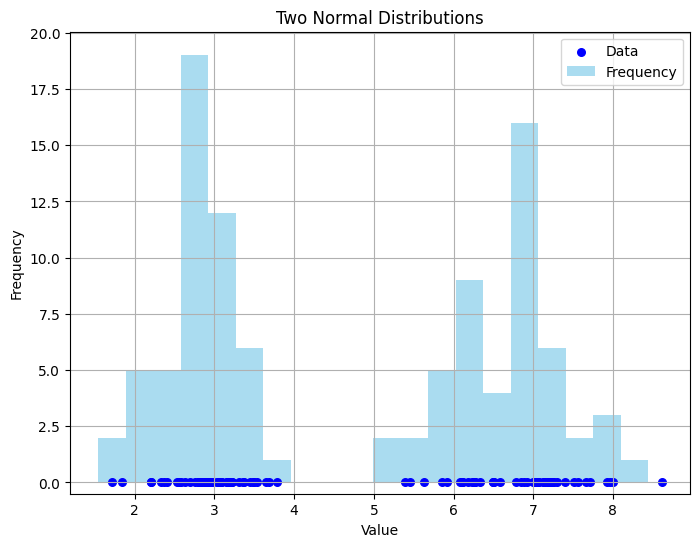

In [204]:
plot_data(data)

In [205]:

# El asterisco es para desempacar la tupla.
def init_random_parameters(K, mean_range=(0, 10), std_range=(0, 1)):
  means = np.random.uniform(*mean_range, size=K)
  stds = np.random.uniform(*std_range, size=K)

  P = np.column_stack((means, stds)).tolist()

  return P

In [206]:
P = init_random_parameters(2)
P

[[6.944066780609878, 0.0069589322520585695],
 [3.4738958807392883, 0.1607984002771753]]

In [207]:
import numpy as np

def calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k):
     if sigma_k == 0:
          return None
     else:
          log_likelihood = -0.5 * np.log(2 * np.pi * sigma_k**2) - 0.5 * (1 / sigma_k) * (x_n - mu_k)**2
          return log_likelihood


In [208]:
import unittest
import numpy as np

class TestCalculateLikelihood(unittest.TestCase):

    def test_likelihood_with_zero_sigma(self):
        x_n = 1.0
        mu_k = 1.0
        sigma_k = 0.0
        result = calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k)

        self.assertIsNone(result)

    def test_likelihood_1(self):
        sigma_k = 1.0
        x_n = 0.0
        mu_k = 0.0

        result = calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k)

        expected_result = -0.9189385332046727
        self.assertAlmostEqual(result, expected_result, places=5)

    def test_likelihood_2(self):
        sigma_k = 2.0
        x_n = 3.0
        mu_k = 1.5

        result = calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k)
        expected_result = -2.174585713764618
        self.assertAlmostEqual(result, expected_result, places=5)


In [209]:
if __name__ == '__main__':
    loader = unittest.TestLoader()
    suite = loader.loadTestsFromTestCase(TestCalculateLikelihood)
    runner = unittest.TextTestRunner()
    runner.run(suite)


...
----------------------------------------------------------------------
Ran 3 tests in 0.001s

OK


In [210]:
def calculate_membership_dataset(X_dataset, Parameters_matrix):
  clusters = len(Parameters_matrix)
  membership_matrix = []

  for row in X_dataset:
    m_index = []

    for k in range(clusters):
      like_index = calculate_likelihood_gaussian_observation(x_n=row[0], mu_k=Parameters_matrix[k][0], sigma_k=Parameters_matrix[k][1])
      m_index.append(like_index)
    membership_matrix.append(m_index)

  return membership_matrix

In [211]:
def make_membership_binary(membership_matrix):
  membership_matrix = np.array(membership_matrix)

  max_indices = np.argmax(membership_matrix, axis=1)
  result_matrix = np.zeros_like(membership_matrix)
  result_matrix[np.arange(membership_matrix.shape[0]), max_indices] = 1

  return result_matrix


In [212]:
membership_matrix = calculate_membership_dataset(data, P)
membership_matrix

[[-1148.0028174418524, 0.02168147702749179],
 [-9.879860836041171, -27.636910552505963],
 [-30.479873537435473, -23.069841330889307],
 [-19.15747399139996, -49.80504282962931],
 [-65.78200778708911, -60.83355751342446],
 [-1029.6812997643706, 0.5844757884541397],
 [-70.76707432887342, -17.75206517008889],
 [1.6276344747018503, -40.60235152092621],
 [-29.158883022673578, -23.301640454826494],
 [-1530.466571680498, -3.2122970469989225],
 [-10.49399945533995, -46.8744859411991],
 [-995.4248856215858, 0.6992515533723725],
 [-44.514357274190324, -20.895433464072322],
 [-1124.6358581579088, 0.15207412117627228],
 [-120.52713187378478, -13.510698157144427],
 [-37.766246553554616, -21.882167894154417],
 [-1015.9020490847116, 0.6334090673034662],
 [-81.70130817295528, -16.670900665518925],
 [-2.1102427777514015, -43.121018497034754],
 [-1060.0906958643488, 0.463719097713292],
 [-37.99378834275841, -54.86371202951004],
 [-23.141834456026196, -24.436810907844162],
 [-1607.507556525366, -4.0735058

In [213]:
binary_membership_matrix = make_membership_binary(membership_matrix)
binary_membership_matrix

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [214]:
def test():
  pass

In [215]:
import torch

def recalculate_parameters(X_dataset, Membership_data):
    X_torch = torch.tensor(X_dataset, dtype=torch.float32)
    Membership_torch = torch.tensor(Membership_data, dtype=torch.float32)

    max_column_indices = torch.argmax(Membership_torch, dim=1)

    matrix = [[] for _ in range(len(Membership_data[0]))]


    for i in range(len(X_torch)):
        matrix[max_column_indices[i].item()].append(X_torch[i].item())

    means = torch.tensor([torch.mean(torch.tensor(row)) for row in matrix], dtype=torch.float32)
    std = torch.tensor([torch.std(torch.tensor(row)) for row in matrix], dtype=torch.float32)

    result_matrix = torch.stack((means, std), dim=1).numpy()


    return result_matrix



In [216]:
new_params_matrix = recalculate_parameters(data, membership_matrix)
new_params_matrix

array([[7.073822 , 0.3373436],
       [3.876722 , 1.6855388]], dtype=float32)

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_multiple_normal_distributions(means, stds, num_points=1000, it=0):
    x = np.linspace(min(means) - 3 * max(stds), max(means) + 3 * max(stds), num_points)

    for mean, std in zip(means, stds):
        # Truncate mean and std to two decimal places
        mean_str = "{:.2f}".format(mean)
        std_str = "{:.2f}".format(std)

        pdf = norm.pdf(x, loc=mean, scale=std)
        plt.plot(x, pdf, label=f'Mean={mean_str}, Std={std_str}')

    plt.title(f'Normal Distributions for iteration {it}')
    plt.xlabel('X')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()


In [218]:
EPOCHS = 5
K = 2




P = init_random_parameters(K=K, mean_range=(0, 50), std_range=(0, 15))  
P = np.array(P)

true_P = init_random_parameters(K=K, mean_range=(0, 50), std_range=(0, 15))
true_P = np.array(true_P)
X = generate_data(N=100, means=true_P[:, 0], stds=true_P[:, 1], K=K)

true_P


array([[11.43181789,  3.2914156 ],
       [22.66978295,  7.8351844 ]])

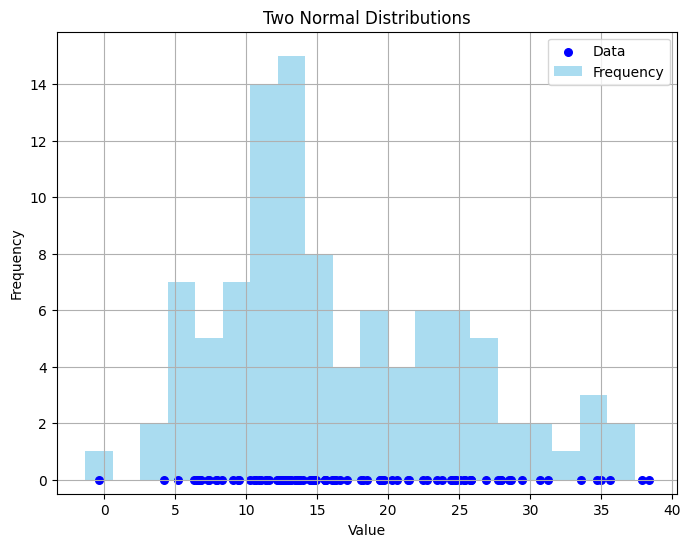

In [219]:
plot_data(X)

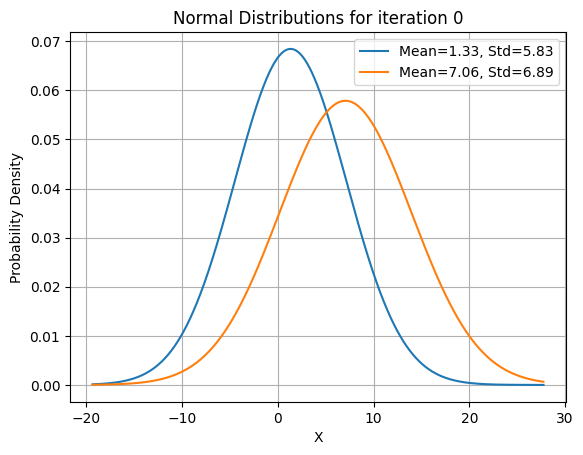

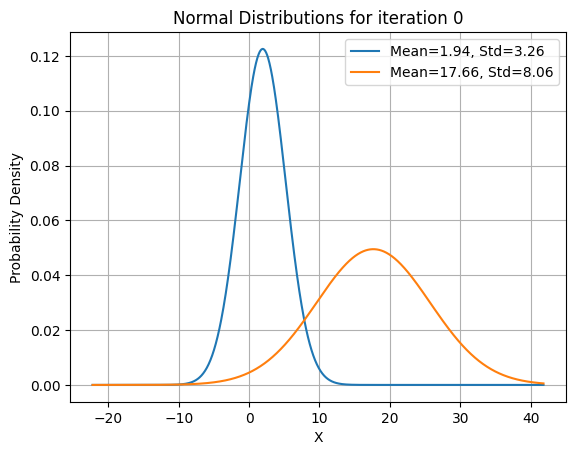

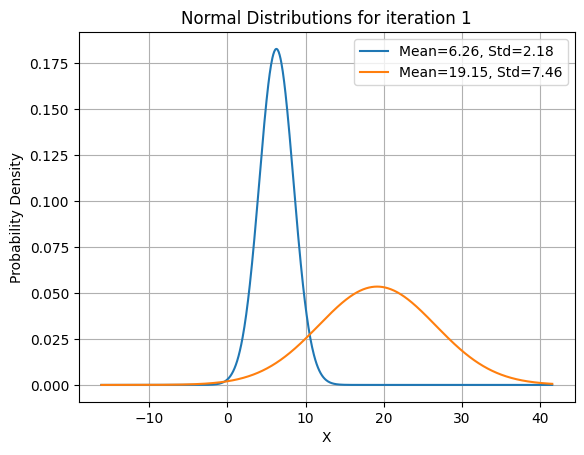

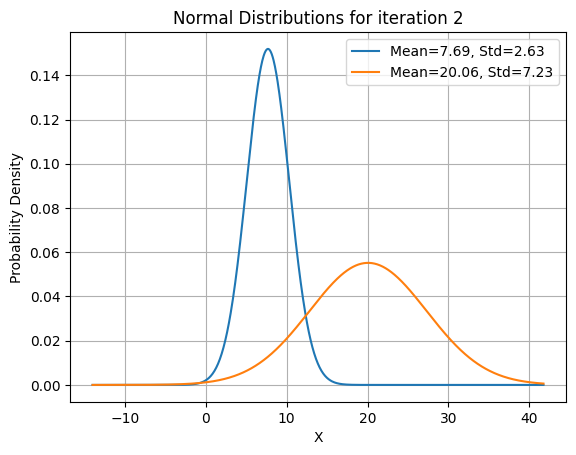

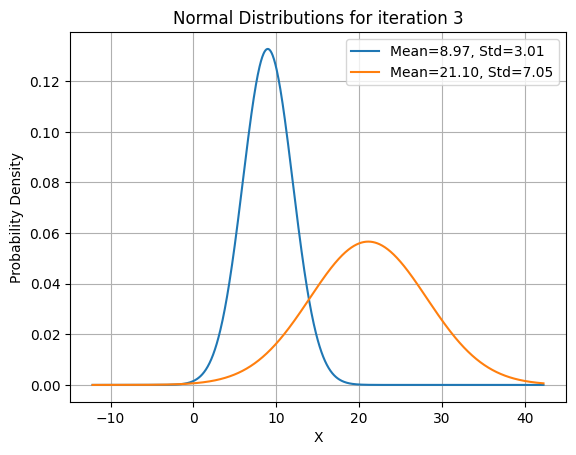

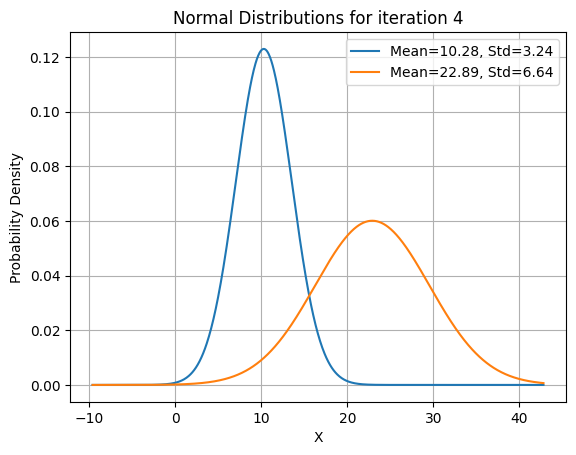

In [220]:
plot_multiple_normal_distributions(means=P[:, 0], stds=P[:, 1])

for i in range(EPOCHS):    
    membership_matrix = calculate_membership_dataset(X, P)
    P = recalculate_parameters(X, membership_matrix)
    plot_multiple_normal_distributions(means=P[:, 0], stds=P[:, 1], it=i)
